# 다중 선형 회귀

특성(독립 변수)들이 여러개인 선형 회귀 모델
* 1차항만 고려한 선형 회귀
* 고차항들을 추가한 다항 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
fish_csv='https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [3]:
fish=pd.read_csv(fish_csv)

In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
perch=fish[fish["Species"]=="Perch"]
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [15]:
X=perch.iloc[:,2:].values   #> 2차원 배열   - 특성 행렬     문제
y=perch["Weight"].values    #> 1차원 배열   - 레이블(타겟)  정답

In [21]:
X[:5,:]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [23]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련/테스트 셋 분리

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42)

In [25]:
X_train.shape, y_train.shape

((42, 4), (42,))

In [26]:
X_test.shape, y_test.shape

((14, 4), (14,))

In [27]:
X_train[:5, :]

array([[19.6   , 20.8   ,  5.1376,  3.0368],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408]])

In [30]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

# 1차항만 고려하는 선형 회귀

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4 = w_0 + X \cdot w
$$

In [31]:
lin_reg=LinearRegression() # 선형 회귀 모델 생성

In [32]:
lin_reg.fit(X_train, y_train)   # 훈련 셋과 훈련 레이블로 모델을 학습시킴

LinearRegression()

In [36]:
# 선형 회귀의 훈련 결과 - > 절편, 계수들을 찾음.
print(lin_reg.intercept_)   #> 숫자 1개
print(lin_reg.coef_)        #> 숫자 4개를 갖는 1차원 배열

-610.0275364260519
[-40.18338554  47.80681727  67.34086612  35.34904264]


In [40]:
# 훈련 셋의 예측값
train_pred=lin_reg.predict(X_train)
train_pred

array([  50.07831254,  149.63115115,   26.52323981,  -11.85322276,
        727.07849472,  216.11818851,  859.35210445,  894.24144157,
        883.76216601,  133.80604761,   30.46174313,  165.45625469,
        267.36647321,  302.42993565,  942.06583292,  859.73196835,
        209.15316045,  137.18128947,  294.64533152,  907.16858502,
        585.54863062,  292.8893912 ,  763.11655759, -149.53132283,
        163.94525857, -104.38889956,  718.95576629,  815.95759166,
        350.34538816,  195.07245372,  764.17125484,  130.77848264,
        116.61555757,  142.50754589,  959.21205119,  218.69399647,
         79.52715018,  737.86169572,  161.30274218,  243.72987423,
        939.22223984,  665.0680958 ])

In [41]:
# 훈련 셋의 평가 점수 - 훈련이 끝난 모델의 score 함수를 사용
lin_reg.score(X_train, y_train)


0.9567246116638569

In [43]:
# 훈련 셋 평가 -metrics 모듈의 함수들 사용
print("R^2", r2_score(y_train, train_pred))
print("MSE", mean_squared_error(y_train, train_pred))

R^2 0.9567246116638569
MSE 5340.176566753986


In [44]:
# RMSE
np.sqrt(mean_squared_error(y_train, train_pred))


73.07651173088372

In [47]:
# 테스트 셋 예측값
test_pred= lin_reg.predict(X_test)
test_pred

array([-334.87262176,   53.65873458,  318.38723843,  178.88939119,
        155.66294578,  798.63147263,  376.67891479,  254.68982136,
        816.85546798,  134.75524994,  977.68496847,  -36.44039106,
        345.60505048,  407.09835927])

In [49]:
y_test  # 테스트 셋 실젯값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [50]:
lin_reg.score(X_test, y_test)

0.8790465615990272

In [51]:
r2_score(y_test, test_pred)

0.8790465615990272

In [52]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_pred))

110.18353109019905

# 2차항까지 추가한 선형 회귀


$$
\hat{y} = w_0 + w_1 \times x_1 + ... + w_4 \times x_4 + w_5 \times x_1^2 + w_6 \times x_1 x_2 + w_7 \times x_1 x_3
$$

In [53]:
poly = PolynomialFeatures(include_bias=False)
scaler= StandardScaler()
reg= LinearRegression()

In [83]:
# 변환기와 예측기를 연결한 머신 러닝 모델 생성
model = Pipeline(steps=[("poly", poly),
                        ("scaler", scaler),
                        ("reg",reg)])

In [112]:
# 모델 훈련 : 
# (1) 다차항 추가 --> (2) 각 특성들의 평균, 표준편차를 찾고 스케일 변환 --> (3) 변환된 데이터로 훈련
# (1) poly.fit_transform() --> (2) scaler.fit_transform() --> (3) reg.fit()
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [88]:
# 선형 회귀 모델 훈련 결과 - 선형 회귀식 절편
model.named_steps["reg"].intercept_

400.833333333325

In [107]:
# 선형 회귀 모델 훈련 결과 - 선형 회귀식 계수들
model.named_steps["reg"].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558515, -210083.78541667,
        -49872.08633922,   29100.85132272,   91656.18352507,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927459,    2288.55011685])

In [106]:
model.named_steps["poly"].get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [113]:
# 훈련 셋 예측값
# (1) 훈련 셋 다차항 추가 --> (2) 모든 특성들 스케일 변환 --> (3) 선형 회귀 모델에서 predict()
# (1) poly.transform() --> (2) scaler.transform() --> (3) reg.predict()
train_pred= model.predict(X_train)
print(train_pred)

[  86.22462498  117.8371985    65.36623277   51.32036181  688.61814191
  166.09437243  880.6739519   900.30918145  991.55155076  111.61287566
  111.82615306  126.79630184  203.74163857  256.18282041 1018.52857265
  889.87606202  151.71744742  128.8552342   262.18048814  958.88194506
  509.75756107  209.09874055  732.73599683   63.71933794  126.00056859
   43.36490993  648.48671444  818.10553377  311.20892879  143.06230598
  721.921373     96.56262516  125.94007862  142.94478702 1050.25814685
  158.62005849   60.19799201  683.20753036  139.33275961  226.26744371
 1060.55561024  595.45584151]


In [114]:
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [116]:
# 훈련 셋 평가 점수 : 
print("R^2" , r2_score(y_train, train_pred))
print("RMSE", np.sqrt(mean_squared_error(y_train, train_pred)))


R^2 0.9920055538341112
RMSE 31.40881218834866


In [120]:
# 테스트 셋 예측값
test_pred = model.predict(X_test)
test_pred

array([  23.11093892,   16.86703258,  283.14558245,  126.83444969,
        121.43654058,  735.72232422,  321.38687695,  167.93520462,
        934.45200382,   93.33407336, 1221.49026679,   20.19532502,
        247.09413925,  243.72607029])

In [121]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [119]:
# 테스트 셋 평가 점수:
print("R^2", r2_score(y_test, test_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, test_pred)))

R^2 0.9492609601553015
RMSE 71.36392024372782


# 고차항에 추가에 따른 $R^2$ score

1차항, 2차항, 3차항, 4차항, 5차항, 50차항 선형회귀 모델 훈련시키고, 훈련 셋과 테스트 셋에서의 $R^2$ score를 계산하고 시각화.

In [128]:
degrees=[1,2,3,4,5,50]

In [123]:
degrees

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [153]:
train=[]    # 훈련 셋의 R^2 score를 저장할 리스트
test=[]     # 테스트 셋의 R^2 score를 저장할 리스트
for n in degrees:
    poly=PolynomialFeatures(degree=n, include_bias=False)
    scaler=StandardScaler()
    reg=LinearRegression()
    
    model=Pipeline(steps=[("poly", poly),
                        ("scaler", scaler),
                        ("reg",reg)])
    
    model.fit(X_train, y_train)
    train_pred=model.predict(X_train)
    train.append(r2_score(y_train, train_pred))
    
    test_pred=model.predict(X_test)
    test.append(r2_score(y_test, test_pred))
    print(k)
print(train)
print(test)

NameError: name 'degrees' is not defined

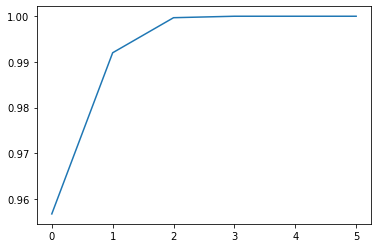

In [151]:
plt.plot(train)

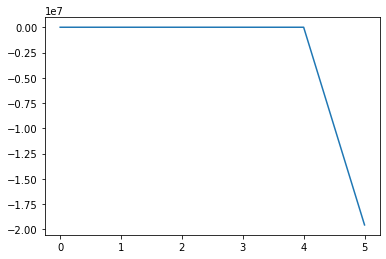

In [152]:
plt.plot(test)